In [1]:

# import the necessary packages
from skimage.segmentation import slic, quickshift
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse
from torchvision import transforms

import scipy
from scipy import ndimage, misc
import numpy as np
import os
import cv2
from PIL import Image
import numpy
import numpy as np
import torch
import pickle
import math

# Extract superpixels and create node features
import scipy.ndimage


from scipy.spatial.distance import cdist
import sys
import os

In [2]:
directory = "C:/Users/rezav/PycharmProjects/benchmarking-gnns/data/superpixels/balanced_melanoma"
n_segments = 300
compactness = 2
sigma = 10
n_plots = 10

In [3]:
def plot_superpixel(n_segments, compactness, sigma, n_plots, class_name):
    count = 0
    split= "train"
    for filename in os.listdir(directory + "/" + split + "/" + class_name):

        input_path = os.path.join(directory+ "/" + split + "/" + class_name + "/", filename)
        image = Image.open(input_path)        
        pix = np.array(image.getdata()).reshape(image.size[0], image.size[1],3) # convert the PIL image to numpy instead of # images = (image.numpy() / 255.)
        superpixels = slic(image, n_segments=n_segments, compactness=compactness, multichannel= True, max_iter = 15,sigma = sigma)

        fig = plt.figure("superpixel -- %d segments" %(n_segments))
        ax = fig.add_subplot(1,1,1)
        ax.imshow(mark_boundaries(image,superpixels))
        plt.show()
        count = count + 1

        if count == n_plots:
            break

# benign examples

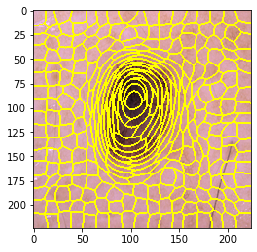

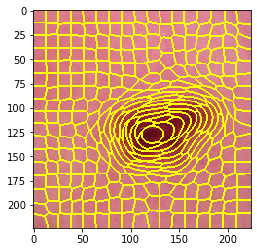

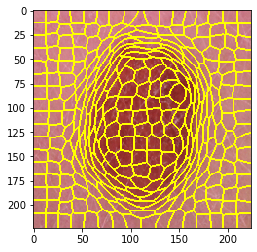

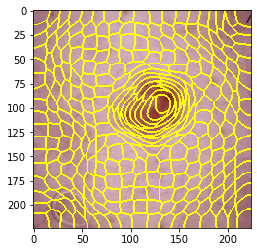

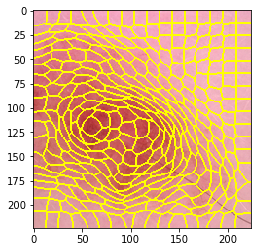

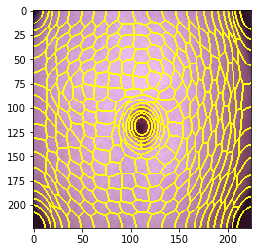

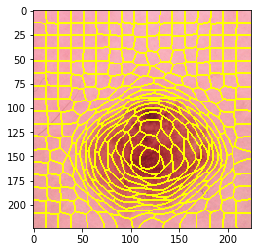

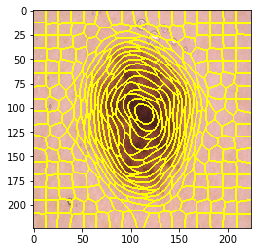

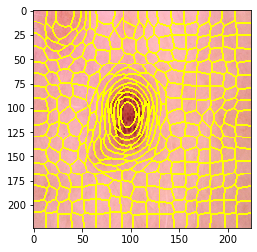

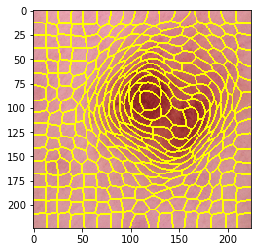

In [4]:
class_name = "benign"

plot_superpixel(n_segments, compactness, sigma, n_plots, class_name)


# malignant examples


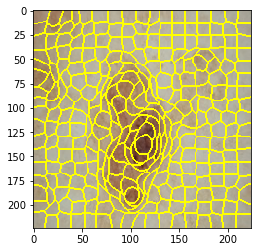

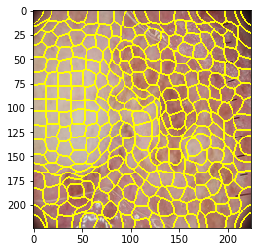

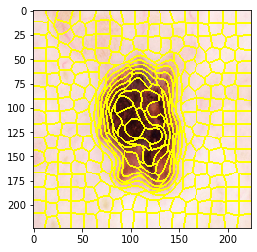

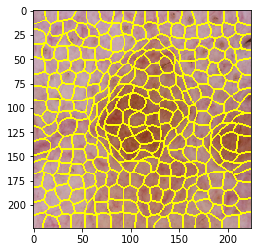

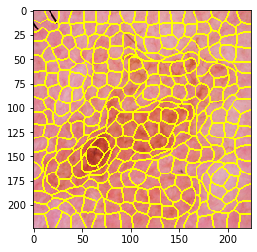

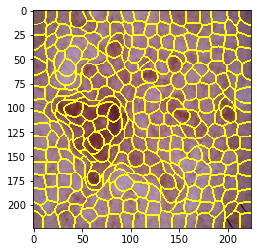

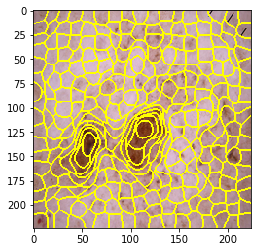

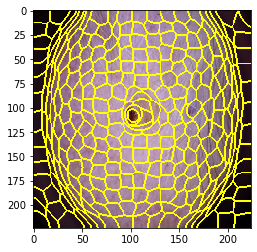

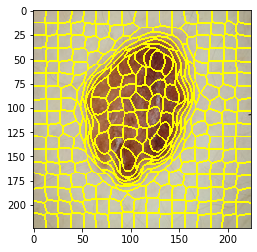

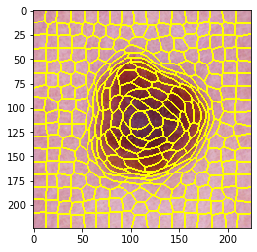

In [11]:

class_name = "malignant"


plot_superpixel(n_segments, compactness, sigma, n_plots, class_name)


In [3]:
def Generate_superpixel(n_segments, compactness, sigma, class_name, finalname):
    count = 0
    all_cp_sp_data = []
    
    # Image transformations
    image_transforms = transforms.Compose([
    transforms.Resize(size=256),
    transforms.CenterCrop(size=224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])    
    
    for filename in os.listdir(directory + "/" + split + "/" + class_name):

        input_path = os.path.join(directory+ "/" + split + "/" + class_name + "/", filename)
        image = Image.open(input_path)        
        pix = np.array(image.getdata()).reshape(image.size[0], image.size[1],3) # convert the PIL image to numpy instead of # images = (image.numpy() / 255.)
        superpixels = slic(image, n_segments=n_segments, compactness=compactness, multichannel= True, max_iter = 15,sigma = sigma)
        
        sp_indices = np.unique(superpixels) # me: che adad hai darim bade superpixel kardan
        n_sp = len(sp_indices)
        
        sp_intensity = np.zeros((n_sp, 3), np.float32) # me: I added the 3rd dim (3)? is it correct?

        sp_coord = np.zeros((n_sp, 2), np.float32)

        img = pix.astype(np.double)
        for seg in sp_indices:
                mask = superpixels == seg # me: mask = True/False , 

                img1 = img[:,:,0]/255.0
#                 print("shape img1",img1.shape)
                img1_ex = np.expand_dims(np.mean(img1[mask]), axis=0)
#                 print("layer1 mean one seg:",img1_ex)

                img2 = img[:,:,1]/255.0
                img2_ex = np.expand_dims(np.mean(img2[mask]), axis=0)
#                 print("layer2 mean one seg:",img2_ex)

                img3 = img[:,:,2]/255.0
                img3_ex = np.expand_dims(np.mean(img3[mask]), axis=0)

                sp_intensity[seg] = np.concatenate([img1_ex,img2_ex,img3_ex])
                sp_coord[seg] = np.array(scipy.ndimage.measurements.center_of_mass(mask)) #me: checked and all the layers have the same center # me:I think it is finding the location of the center of the mass#me : So the sp_coord is our nodes now

        img_t = image_transforms(image)
        cp_sp_data = (sp_intensity,sp_coord,sp_indices,img_t) ## this gives us the same format we want but shape is not ok and not sure if the whole list will be the same as what we want
        all_cp_sp_data.append(cp_sp_data) ## stack all the CPs


        if(count%50 == 0):
                print(f'{count} is passed')
        
        count = count + 1

    with open(finalname + '.pkl', 'wb') as filehandle:
         # store the data as binary data stream
        print(len(all_cp_sp_data))
        pickle.dump(all_cp_sp_data, filehandle)
        


In [4]:
split = "train"
class_name = "malignant"
finalname= class_name + "_" + split + "_" + "superpixels"
Generate_superpixel(n_segments, compactness, sigma, class_name, finalname)

0 is passed
50 is passed
100 is passed
150 is passed
200 is passed
250 is passed
300 is passed
350 is passed
400 is passed
450 is passed
500 is passed
550 is passed
600 is passed
650 is passed
700 is passed
750 is passed
800 is passed
850 is passed
900 is passed
950 is passed
1000 is passed
1050 is passed
1100 is passed
1150 is passed
1197


In [5]:
split = "train"
class_name = "benign"
finalname= class_name + "_" + split + "_" + "superpixels"
Generate_superpixel(n_segments, compactness, sigma, class_name, finalname)

0 is passed
50 is passed
100 is passed
150 is passed
200 is passed
250 is passed
300 is passed
350 is passed
400 is passed
450 is passed
500 is passed
550 is passed
600 is passed
650 is passed
700 is passed
750 is passed
800 is passed
850 is passed
900 is passed
950 is passed
1000 is passed
1050 is passed
1100 is passed
1150 is passed
1200 is passed
1250 is passed
1300 is passed
1350 is passed
1400 is passed
1440


In [6]:
split = "test"
class_name = "malignant"
finalname= class_name + "_" + split + "_" + "superpixels"
Generate_superpixel(n_segments, compactness, sigma, class_name, finalname)

0 is passed
50 is passed
100 is passed
150 is passed
200 is passed
250 is passed
300


In [7]:
class_name = "benign"
finalname= class_name + "_" + split + "_" + "superpixels"
Generate_superpixel(n_segments, compactness, sigma, class_name, finalname)

0 is passed
50 is passed
100 is passed
150 is passed
200 is passed
250 is passed
300 is passed
350 is passed
360
